In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("DeanSautmann-WBER-HealthOutcomesMali (1).csv")

In [3]:
df.head()

,FPrimary,Person_ID,compound,Mother_ID,surveyor_ID,survey_date,consent,child_consent_,TrtOrder,TrtOrder2013,...,Ill_days_total,Blood_Stool_last_week,Three_Stool_last_week,MUAC_danger,mosquito_net_correct,Months_breastfeeding_correct,ORT_ingr_correct,tag_HH,tag_C,tag_M
0,301,102,3,100,36,10/31/2014,1.0,9.0,1.0,1.0,...,3,0,0,0.0,0,0,0,0,1,1
1,301,101,3,100,36,10/31/2014,1.0,9.0,1.0,1.0,...,0,0,0,NaN,0,0,0,1,0,0
2,601,101,6,100,36,10/30/2014,1.0,9.0,1.0,1.0,...,0,0,0,0.0,1,1,1,1,0,1
3,602,105,6,100,36,10/30/2014,1.0,9.0,1.0,1.0,...,0,0,0,NaN,1,1,1,0,1,1
4,602,310,6,300,36,10/30/2014,1.0,9.0,1.0,1.0,...,0,0,0,0.0,1,0,1,0,0,1


In [4]:
df.columns

Index(['FPrimary', 'Person_ID', 'compound', 'Mother_ID', 'surveyor_ID',
       'survey_date', 'consent', 'child_consent_', 'TrtOrder', 'TrtOrder2013',
       ...
       'Ill_days_total', 'Blood_Stool_last_week', 'Three_Stool_last_week',
       'MUAC_danger', 'mosquito_net_correct', 'Months_breastfeeding_correct',
       'ORT_ingr_correct', 'tag_HH', 'tag_C', 'tag_M'],
      dtype='object', length=243)

In [5]:
df.dtypes

FPrimary                        int64
Person_ID                       int64
compound                        int64
Mother_ID                       int64
surveyor_ID                     int64
                                ...  
Months_breastfeeding_correct    int64
ORT_ingr_correct                int64
tag_HH                          int64
tag_C                           int64
tag_M                           int64
Length: 243, dtype: object

In [6]:
df.shape

(1652, 243)

### droping null values>60%

In [7]:
threshold = len(df) * 0.4
df = df.dropna(axis=1, thresh=threshold)

In [8]:
df.shape

(1652, 152)

### seperate catgorical and numerical columns

In [9]:
binary_cols = [
    col for col in df.select_dtypes(include=[np.number]).columns
    if set(df[col].dropna().unique()) <= {0, 1}
]

numerical_cols = [
    col for col in df.select_dtypes(include=[np.number]).columns
    if col not in binary_cols]

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Binary columns:", binary_cols)
print("Numeric columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Binary columns: ['consent', 'Treatment1', 'Treatment2', 'Treatment3', 'Treatment4', 'In2014', 'same_compound', 'same_mother', 'GenderFA', 'LitFA', 'LangFA', 'SalaryFA', 'OOccupier', 'RelsFA', 'OldFA', 'gender', 'vaccine_card_available', 'child_present_', 'health_program_', 'health_worker_visits_check_', 'health_worker_last_2_weeks_', 'free_care_check_', 'BCG_', 'Polio_0_', 'Polio_1_', 'Polio_2_', 'Polio_3_', 'DTCoq_1_', 'DTCoq_2_', 'DTCoq_3_', 'HepatitisB_1_', 'HepatitisB_2_', 'HepatitisB_3_', 'Hib_1_', 'Hib_3_', 'Measles_', 'Yellow_Fever_', 'Vit_A_', 'Vaccine_sr_', 'BCG_sr_', 'Polio_sr_', 'DTCoq_sr_', 'Measles_sr_', 'Vit_A_sr_', 'Ill_last_week_', 'Ill_day_1_', 'Ill_day_2_', 'Ill_day_3_', 'Ill_day_4_', 'Ill_day_5_', 'Ill_day_6_', 'Ill_day_7_', 'Diarrhea_last_week_', 'Diarrhea_day_1_', 'Diarrhea_day_2_', 'Diarrhea_day_3_', 'Diarrhea_day_4_', 'Diarrhea_day_5_', 'Diarrhea_day_6_', 'Diarrhea_day_7_', 'Blood_Stool_day_1_', 'Blood_Stool_day_2_', 'Blood_Stool_day_3_', 'Blood_Stool_day_4_', 'B

In [10]:
df = df.drop(columns=categorical_cols)

### filling null values

In [11]:
from sklearn.impute import SimpleImputer

df[numerical_cols] = SimpleImputer(strategy='mean').fit_transform(df[numerical_cols])

df[binary_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[binary_cols]).astype(int)

In [12]:
print(df[numerical_cols].isna().sum())
print(df[numerical_cols].isnull().sum())  


FPrimary                   0
Person_ID                  0
compound                   0
Mother_ID                  0
surveyor_ID                0
child_consent_             0
TrtOrder                   0
TrtOrder2013               0
AttrStatus                 0
Stratum                    0
HHmembers_12               0
LogAssets                  0
dist1                      0
Diarrhea_2013              0
age_2014                   0
ageyear_2014               0
agegroup_2014              0
age_2014_2                 0
age_2014_3                 0
age_2014_4                 0
vaccines_taken             0
vaccines_taken_nocard      0
health_program_name_       0
health_program_benefit_    0
health_worker_provides_    0
MUAC_Unadjusted            0
child_weighing_type_       0
child_weight_1_            0
child_weight_2_            0
vaccine_card_              0
Hib_2_                     0
Mosquito_net_status_       0
Current_water_source       0
Measured_chlorine          0
Months_breastf

In [13]:
df.tail()

,FPrimary,Person_ID,compound,Mother_ID,surveyor_ID,consent,child_consent_,TrtOrder,TrtOrder2013,Treatment1,...,Ill_days_total,Blood_Stool_last_week,Three_Stool_last_week,MUAC_danger,mosquito_net_correct,Months_breastfeeding_correct,ORT_ingr_correct,tag_HH,tag_C,tag_M
1647,550201.0,5151.0,5502.0,5100.0,40.0,1,7.652893,4.0,4.000000,0,...,0.0,0,0,0,1,1,1,0,0,1
1648,550201.0,5150.0,5502.0,5100.0,40.0,1,7.652893,4.0,4.000000,0,...,0.0,0,0,0,1,1,1,1,1,0
1649,580101.0,5152.0,5801.0,5100.0,40.0,1,7.652893,3.0,3.000000,0,...,0.0,0,0,0,1,1,0,0,1,1
1650,580101.0,5153.0,5801.0,5100.0,40.0,1,7.652893,3.0,2.507339,0,...,0.0,0,0,0,1,1,0,1,0,0
1651,580201.0,5050.0,5802.0,5000.0,25.0,1,9.000000,2.0,2.000000,0,...,0.0,0,0,0,1,1,1,0,1,1


### droping high correlated features

In [14]:
corr = df.corr(numeric_only=True)
corr_target = corr['Ill_last_week_'].sort_values(ascending=False)
print(corr_target)

Ill_last_week_    1.000000
Ill_days_total    0.792698
Ill_day_5_        0.736596
Ill_day_6_        0.712887
Ill_day_4_        0.700827
                    ...   
child_present_         NaN
ORT_water              NaN
ORT_sugar              NaN
ORT_salt               NaN
MUAC_flag              NaN
Name: Ill_last_week_, Length: 150, dtype: float64


In [15]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

print("Highly correlated features to drop:", to_drop)
df= df.drop(columns=to_drop)

Highly correlated features to drop: ['compound', 'Mother_ID', 'TrtOrder2013', 'ageyear_2014', 'agegroup_2014', 'age_2014_2', 'age_2014_3', 'age_2014_4', 'child_weight_2_', 'Polio_2_', 'Polio_3_', 'DTCoq_2_', 'DTCoq_3_', 'HepatitisB_2_', 'HepatitisB_3_', 'Hib_1_', 'Hib_2_', 'Hib_3_', 'Yellow_Fever_', 'Diarrhea_day_3_', 'Blood_Stool_day_5_', 'Blood_Stool_day_7_', 'Three_Stool_day_2_', 'Three_Stool_day_3_', 'Three_Stool_day_5_', 'Three_Stool_day_6_', 'weight', 'muac', 'Blood_Stool_days_total', 'Three_Stool_days_total', 'Ill_days_total', 'Blood_Stool_last_week', 'Three_Stool_last_week', 'mosquito_net_correct', 'ORT_ingr_correct']


In [16]:
df.shape

(1652, 115)

### split features and target(x,y)

In [17]:
x=df.drop(["Ill_last_week_"], axis="columns")
y = df["Ill_last_week_"]

### droping id,leaky columns

In [18]:
keywords = ['id','date','diarrhea', 'stool', 'hospital', 'clinic', 'treatment', 'pharmacy', 'day', 'week', 'age']

x = x.drop(columns=[col for col in x.columns if any(k in col.lower() for k in keywords)])


In [19]:
x.shape

(1652, 65)

### droping Low-Variance Features 

In [20]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
x = x[x.columns[selector.fit(x).get_support()]]
df = pd.concat([x, df['Ill_last_week_']], axis=1)


In [21]:
x.shape

(1652, 54)

### train test split

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

### dimonsion reduction using RFE

In [23]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)

selector = RFE(model, n_features_to_select=10)
selector.fit(xtrain, ytrain)

selected_features = xtrain.columns[selector.support_]
print("Selected features:", selected_features.tolist())



Selected features: ['FPrimary', 'Stratum', 'HHmembers_12', 'LogAssets', 'dist1', 'vaccines_taken_nocard', 'MUAC_Unadjusted', 'child_weight_1_', 'Measured_chlorine', 'MUAC']


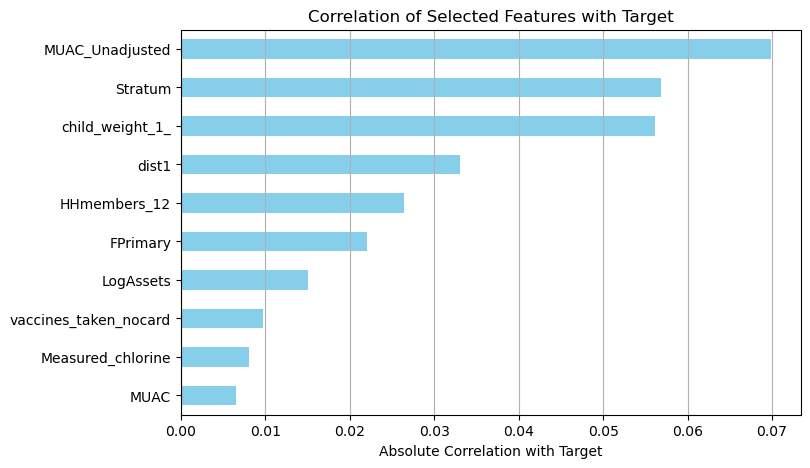

In [24]:
correlations = xtrain[selected_features].apply(lambda col: col.corr(ytrain))

correlations_sorted = correlations.abs().sort_values(ascending=True)

plt.figure(figsize=(8, len(correlations_sorted) * 0.5))
correlations_sorted.plot(kind='barh', color='skyblue')
plt.xlabel('Absolute Correlation with Target')
plt.title('Correlation of Selected Features with Target')
plt.grid(axis='x')
plt.show()


In [25]:
xtrain.head()

,FPrimary,child_consent_,TrtOrder,AttrStatus,same_compound,same_mother,Stratum,HHmembers_12,GenderFA,LitFA,...,Water_changed,Measured_chlorine,ORT_recipe,Months_breastfeeding,MUAC,MUAC_danger,Months_breastfeeding_correct,tag_HH,tag_C,tag_M
210,10402.0,9.0,2.0,6.00000,1,1,20.0,11.0,1,0,...,1,0.0,0,28.0,-0.570139,0,0,0,0,1
1525,71412.0,9.0,2.0,6.04531,1,1,9.0,3.0,1,0,...,1,0.0,1,8.0,-1.950000,1,0,0,0,1
1385,64901.0,9.0,1.0,6.00000,1,1,13.0,13.0,1,1,...,0,0.0,0,18.0,1.220000,0,0,1,1,1
1027,49901.0,9.0,4.0,7.00000,1,1,13.0,11.0,1,1,...,0,0.4,1,6.0,-0.610000,0,1,1,0,0
1032,50002.0,9.0,4.0,6.00000,1,1,8.0,7.0,1,1,...,1,0.0,0,6.0,-0.570139,0,1,0,1,0


In [26]:
X_train_rfe = xtrain[selected_features]  
X_test_rfe = xtest[selected_features]

In [27]:
xtrain.shape

(1321, 54)

### sclaing numerical columns

In [28]:
from sklearn.preprocessing import StandardScaler


numeric_in_selected = [c for c in numerical_cols if c in X_train_rfe.columns]

scaler = StandardScaler()

if numeric_in_selected:
    X_train_rfe[numeric_in_selected] = scaler.fit_transform(X_train_rfe[numeric_in_selected])
    X_test_rfe[numeric_in_selected]  = scaler.transform(X_test_rfe[numeric_in_selected])


C:\Users\user\AppData\Local\Temp\ipykernel_12924\1252135903.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe[numeric_in_selected] = scaler.fit_transform(X_train_rfe[numeric_in_selected])
C:\Users\user\AppData\Local\Temp\ipykernel_12924\1252135903.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_rfe[numeric_in_selected]  = scaler.transform(X_test_rfe[numeric_in_selected])


### smotting

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_rfe, ytrain)


In [30]:
print(pd.Series(y_train_res).value_counts())


Ill_last_week_
0    1132
1    1132
Name: count, dtype: int64


### applying multiple models

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='accuracy')
    mean_score = np.mean(scores)
    cv_results[name] = mean_score
    print(f"{name}: Average CV Accuracy = {mean_score:.2f}")

Logistic Regression: Average CV Accuracy = 0.59
Random Forest: Average CV Accuracy = 0.92
Decision Tree: Average CV Accuracy = 0.83
SVM: Average CV Accuracy = 0.75
KNN: Average CV Accuracy = 0.78
Naive Bayes: Average CV Accuracy = 0.58


###  Pick best model 


In [32]:
best_model_name = max(cv_results, key=cv_results.get)
best_model = models[best_model_name]
best_model.fit(X_train_res, y_train_res)
test_accuracy = best_model.score(X_test_rfe, ytest)
test_accuracy = best_model.score(X_test_rfe, ytest)

print("\nBest Model from CV:", best_model_name)


Best Model from CV: Random Forest


### hyper parameter tuning

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)

param_grid = {
    'n_estimators': [100, 200],        
    'max_depth': [None, 20],           
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [34]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_res, y_train_res)


best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 90.70%


In [35]:
y_pred = best_model.predict(X_test_rfe)

# Test accuracy
test_accuracy = best_model.score(X_test_rfe, ytest) * 100
print("Test Accuracy: {:.2f}%".format(test_accuracy))


Test Accuracy: 83.08%


### confusion matrix

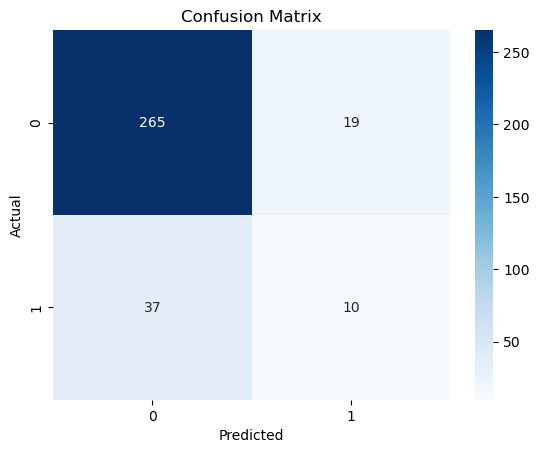


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       284
           1       0.34      0.21      0.26        47

    accuracy                           0.83       331
   macro avg       0.61      0.57      0.58       331
weighted avg       0.80      0.83      0.81       331



In [36]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n", classification_report(ytest, y_pred))


In [37]:
import joblib

In [38]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [39]:
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [40]:
joblib.dump(numeric_in_selected, "numeric_in_selected.pkl")


['numeric_in_selected.pkl']